# What is the True Normal Human Body Temperature?

Background

The mean normal body temperature was held to be 37∘C or 98.6∘ F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

# Exercises

In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions in this notebook below and submit to your Github account.

Is the distribution of body temperatures normal?

Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.

Is the sample size large? Are the observations independent?

Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.

Is the true population mean really 98.6 degrees F?

Would you use a one-sample or two-sample test? Why?

In this situation, is it appropriate to use the t or z statistic?

Now try using the other test. How is the result be different? Why?

Draw a small sample of size 10 from the data and repeat both tests.

Which one is the correct one to use?

What do you notice? What does this tell you about the difference in application of the `t

At what temperature should we consider someone's temperature to be "abnormal"?

Start by computing the margin of error and confidence interval.

Is there a significant difference between males and females in normal temperature?

What test did you use and why?

Write a story with your conclusion in the context of the original problem.

In [8]:
from IPython.display import HTML
HTML('<iframe src=http://stanford.edu/~mwaskom/software/seaborn/index.html width=700 height=350></iframe>')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

In [9]:
#seaborn settings
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8,4)})

In [10]:
file= '/home/kiran/Desktop/Springboard/human_temp/data/human_body_temperature.csv'

In [11]:
df=pd.read_csv(file)

In [12]:
df.head(5)

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


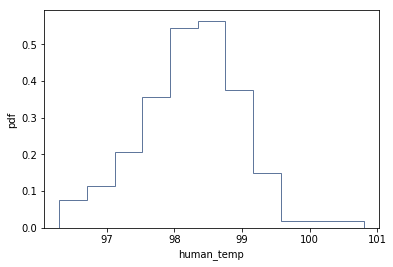

In [13]:
# Plotting histogram to check the distribution
human_temp=df['temperature'].values # extracted all the temperature values as numpy array
n_data = len(human_temp)
n_bins = np.sqrt(n_data)  # calculating number of bins
n_bins = int(n_bins)
n_bins = int(n_bins)
_=plt.hist(human_temp,bins=n_bins,normed= True,histtype = 'step')
plt.xlabel('human_temp')
plt.ylabel('pdf')
plt.show()

#Below graph looks like Normal Distribution

In [14]:
# Summary staistics for the temperature column
mu= np.mean(human_temp)
print(mu)
sigma=np.std(human_temp)
print(sigma)


98.2492307692
0.730357778905


In [15]:
# Writing function to calculate ECDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
   
       
    # Number of data points: n
    n =len(data)

    # x-data for the ECDF: x

    x= np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

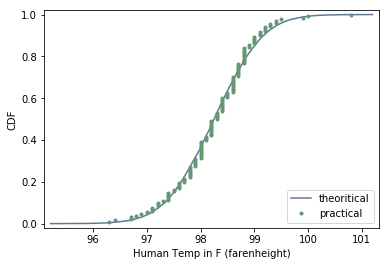

In [16]:
## Using ECDF plot to dtermine Normal Distrubution

# Compute mean and standard deviation: mu, sigma
mu = np.mean(human_temp)
sigma = np.std(human_temp)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu,sigma,10000)

# Get the CDF of the samples and of the data
x_theor,y_theor =ecdf(samples)
x,y = ecdf(human_temp)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Human Temp in F (farenheight)')
_ = plt.ylabel('CDF')
_=plt.legend(('theoritical','practical'),loc ='lower right')
plt.show()

## From the figure below it looks like distrubiton is normal since it closely resembles the theoritical normal distribution

In [17]:
#Size of the dataset
len(human_temp)

# Since the sample size is greater than 50 the sample size is large and since the distribution follows normal distribution 
# so the assumption is values are independent of each ther


130

# Is the true population mean really 98.6 degrees F?
 For this I will use one sample test since here I am comparing one set of data to a single number mean 98.6 F
 Also since the sample size is large i.e  >30 I will use z staistic


Our Null Hypothesis H0: Average Human Temperature = 98.6 
Alternate Hypothesis H1: Avergae human temerature is <98.6

In [18]:
# Summary staistics for the temperature column
mu= np.mean(human_temp)
print(mu)
sigma=np.std(human_temp)
print(sigma)

98.2492307692
0.730357778905


In [19]:
population_mean=98.6
Z_value = (mu-population_mean)/(sigma/np.sqrt(len(human_temp)))
print('The Z Statistic is: %s' % Z_value)

The Z Statistic is: -5.47592520208


In [20]:
# The value of other t statistic will be the same since the sample size is large

In [21]:
#P value calculation
new_mean_value= 98.6 #F
Mean_temp_shifted= human_temp-np.mean(human_temp)+ new_mean_value
#Now I will use bootstrap replicates to repeat the sampling of human temp large number of times with shifted mean.
#For that I will write a boot strap function
# Bootstarp Function
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    def bootstrap_replicate_1d(data, func):
        return func(np.random.choice(data, size=len(data)))
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)
    return bs_replicates


In [22]:
bs_replicates = draw_bs_reps(Mean_temp_shifted,np.mean,10000)

In [23]:
#Computing the fraction of replicates that are less than or equal to obsereved mean_tmep of 98.6 F

p =np.sum(bs_replicates<=np.mean(human_temp))/10000
print('The p-value is : %s'% p)

The p-value is : 0.0


In [24]:
# This states that we can accept the null hypothesis that avergae human temp is equal to true population mean 98.6 

In [25]:
#Extract the sample size of 10
human_temp_10=np.random.choice(human_temp,size=10)
human_temp_10

array([ 98.8,  97.2,  97.5,  98.4,  98.6,  98.2,  98.4,  98.8,  98. ,  97.4])

In [26]:
#Now Since the sample size is small that is less than 30 so we wil use t-test/statistic

In [27]:
#Summary Statistics
mu_10=np.mean(human_temp_10)
print(mu_10)
sigma_10=np.std(human_temp_10)
print(sigma_10)

98.13
0.555067563455


In [28]:
T_value=(mu_10-population_mean)/(sigma_10/np.sqrt(len(human_temp_10)))
print('The t-value will be: %s'%T_value)

The t-value will be: -2.67763890044


In [29]:
#Since the sample size is small and population standard deviation is not know we can't calculate z-statistic for this case

# At what temperature should we consider someone's temperature to be "abnormal"?

In [30]:
#I will use the Bootstrap function which I wrote in previou steps to generate 10000 samples of measurements of human tempreture

In [31]:
bs_replicates_temp=draw_bs_reps(human_temp,np.mean,10000)
sem= np.std(human_temp)/np.sqrt(len(human_temp))#Standard error of mean
print('THe SEM is: %s' %sem)

THe SEM is: 0.0640566146952


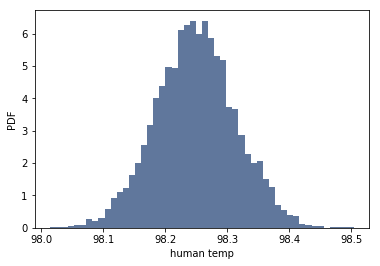

In [32]:
# Histogram of results
_=plt.hist(bs_replicates_temp,bins=50,normed= True)
_=plt.xlabel('human temp')
_=plt.ylabel('PDF')
plt.show()

In [33]:
# The 95% confidence interval are as follows:
conf_int=np.percentile(bs_replicates,[2.5,97.5])
conf_int

array([ 98.47538462,  98.72771154])

In [34]:
print('95% confidence interval =', conf_int,'F')
#If the tempreature is outside this limits than it is considered abnormal with marging of error of 5%

95% confidence interval = [ 98.47538462  98.72771154] F


In [35]:
#If the tempreature is outside this limits than it is considered abnormal with marging of error of 5%

# Is there a significant difference between males and females in normal temperature?

Null hypothesis Ho: temp_males=temp_females
ALternate Hypothesis H1: temp_males != temp_females

In [36]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [37]:
#Extracting male temperatures
temp_male=df[df.gender=='M']
temp_male=temp_male['temperature'].values
temp_male


array([ 97.8,  99.2,  98. ,  98.8,  98.2,  98.2,  99.4,  98.2,  98.6,
        98.4,  97.8,  98.1,  98.3,  98.5,  98.6,  99.3,  99.5,  99.1,
        98.3,  98.4,  96.9,  97.2,  97.4,  97.4,  97.9,  97.1,  98.6,
        98.2,  97.6,  98.4,  98.6,  97.4,  98.6,  98.9,  98. ,  98.8,
        99. ,  98.8,  98.4,  97.4,  97.6,  98. ,  97.5,  97.1,  98. ,
        98.7,  98.1,  97.8,  97.1,  97.8,  98. ,  99. ,  98.5,  97.6,
        96.7,  97. ,  98.6,  97.3,  99. ,  98. ,  98.7,  97.5,  96.3,
        97.7,  97.9])

In [38]:
#Extracting Female temperature
temp_female=df[df.gender=='F']
temp_female=temp_female['temperature'].values
temp_female

array([  99.3,   98.4,   99.2,   98. ,   98.4,   98.6,   98.8,   96.7,
         98.7,   97.8,   98.8,   98.3,   97.2,   98.3,   98. ,   97.8,
         98.2,   98.4,   97.6,   97.9,   96.4,   98.4,   99. ,   97.9,
         98.9,   98.3,   98.5,   98.2,   98.6,   98.8,   98.2,   99.1,
         98.2,   98.7,   97.4,   98.7,   98.1,   97.7,   98. ,   98.8,
         99.2,   98.6,   98.6,  100. ,   98.8,   96.8,   99.9,   98.7,
         98.8,   98. ,   99.4,   98.7,   98.8,   98. ,   98.2,   99.1,
        100.8,   97.8,   98.4,   97.7,   97.9,   99. ,   97.2,   98.2,
         98.7])

In [51]:
temp_concat=np.concatenate((temp_male,temp_female))#Concetenate both male and female arrays

# Compute mean of all forces: mean_force
mean_temp_all = np.mean(temp_concat)

# Generate shifted arrays
temp_m_shifted = temp_male - np.mean(temp_male) + mean_temp_all
temp_f_shifted = temp_female - np.mean(temp_female) + mean_temp_all

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_m = draw_bs_reps(temp_m_shifted, np.mean, 10000)
bs_replicates_f = draw_bs_reps(temp_f_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_m - bs_replicates_f
print('THe difference in means of bootstrap replicates :%s'%bs_replicates)

# Calculate diff_of_means_actual
empirical_diff_means = np.mean(temp_male)-np.mean(temp_female)
print('THe empirical means :%s'%empirical_diff_means)

# Compute and print p-value: p
p = np.sum(bs_replicates>=empirical_diff_means) / 10000
print('p-value =', p)

THe difference in means of bootstrap replicates :[-0.31230769  0.06615385  0.07846154 ...,  0.08769231 -0.13384615
 -0.19538462]
THe empirical means :-0.289230769231
p-value = 0.9863


From the above p-value we can say that there is no significant differecne in Average Temperatures of male and female   